In [43]:
import pandas as pd
import numpy as np 
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import csv

In [44]:

def disEuclidian(point1, point2):
    return np.sqrt(sum((x - y) ** 2 for x, y in zip(point1, point2)))

def centroidsRand(data, k):
    centroids = random.sample(data, k)
    return centroids

def AsignCentroids(data, centroids):
    clusters = [[] for _ in range(len(centroids))]
    
    for point in data:
        distances = [disEuclidian(point, centroid) for centroid in centroids]
        cluster_index = distances.index(min(distances))
        clusters[cluster_index].append(point)
    
    return clusters

def newCentroids(clusters):
    centroids = []
    for cluster in clusters:
        cluster_center = [sum(point[i] for point in cluster) / len(cluster) for i in range(len(cluster[0]))]
        centroids.append(cluster_center)
    return centroids

def covergencia(old_centroids, new_centroids, tol=1e-4):
    return all(disEuclidian(old, new) < tol for old, new in zip(old_centroids, new_centroids))

def k_means(data, k):
    centroids = centroidsRand(data, k)
    converged = False
    
    while not converged:
        clusters = AsignCentroids(data, centroids)
        new_centroids = newCentroids(clusters)
        converged = covergencia(centroids, new_centroids)
        centroids = new_centroids
    
    return centroids, clusters


In [45]:
def plot_clusters(centroids, clusters):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    # Graficar puntos y centroides
    for i, cluster in enumerate(clusters):
        x, y = zip(*cluster)
        ax1.scatter(x, y, label=f'Cluster {i + 1}')

    centroids_x, centroids_y = zip(*centroids)
    ax1.scatter(centroids_x, centroids_y, color='black', marker='x', s=100, label='Centroides')

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_title('K-Means Clustering')
    ax1.legend()
    ax1.grid(True)

In [46]:

def plot_clusters_3d(centroids, clusters):
    fig = plt.figure(figsize=(10, 6))
    ax1 = fig.add_subplot(111, projection='3d')

    for i, cluster in enumerate(clusters):
        x, y, z = zip(*cluster)
        ax1.scatter(x, y, z, label=f'Cluster {i + 1}')

    centroids_x, centroids_y, centroids_z = zip(*centroids)
    ax1.scatter(centroids_x, centroids_y, centroids_z, color='black', marker='x', s=100, label='Centroides')

    ax1.set_xlabel('X')
    ax1.set_ylabel('Y')
    ax1.set_zlabel('Z')
    ax1.set_title('K-Means Clustering in 3D')
    ax1.legend()

    plt.show()

In [47]:
def calculate_inertia(k, clusters, centroids):
    total_inertia = 0
    for i in range(k):
        cluster_points = clusters[i]
        centroid = centroids[i]
        inertia_cluster = sum(disEuclidian(centroid, point) ** 2 for point in cluster_points)
        total_inertia += inertia_cluster
    return total_inertia

In [48]:
def kMeansComplete(Archive, listaCaracteristicas, k): 
    data = pd.read_csv(Archive)
    for columna in listaCaracteristicas:
        data = data[data[columna] != 0]
        
    columnas_seleccionadas = data[listaCaracteristicas]
    data_list = columnas_seleccionadas.values.tolist()
    centroids, clusters = k_means(data_list, k)    
    
    inertia = []
    for k in range(1, len(clusters) + 1):
        total_inertia = calculate_inertia(k, clusters, centroids)
        inertia.append(total_inertia)

    if len(listaCaracteristicas) == 2:
        plot_clusters(centroids, clusters)
    elif len(listaCaracteristicas) == 3:
        plot_clusters_3d(centroids, clusters) 
    for i, centroid in enumerate(centroids):
        print(f"Centroide {i + 1}: {centroid}")
        #print(f"Puntos en el cluster {i + 1}: {clusters[i]}")
        
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(clusters) + 1), inertia, marker='o', linestyle='-', color='b')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inercia')
    plt.title('Método del Codo para Determinar k')
    plt.grid(True)
    plt.show()

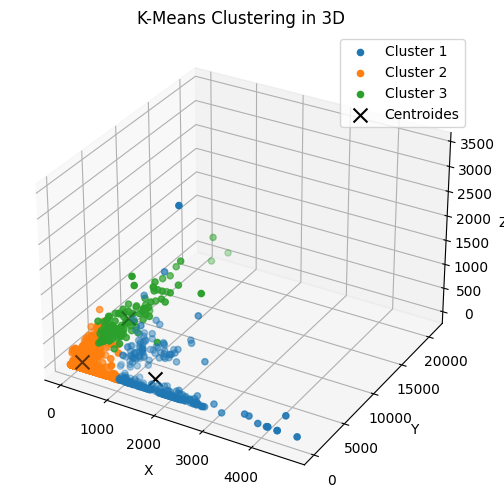

Centroide 1: [1759.2628398791542, 465.99093655589127, 181.66163141993957]
Centroide 2: [216.10936093609362, 317.22727272727275, 72.25112511251125]
Centroide 3: [489.625, 5486.078125, 463.9609375]


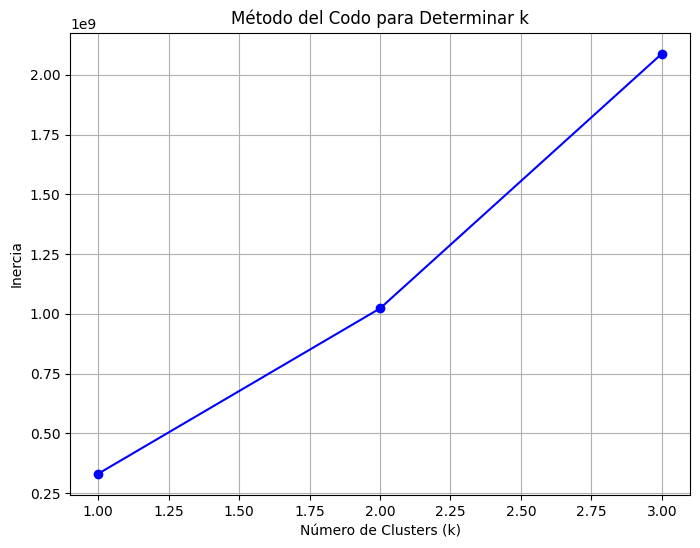

In [49]:
kMeansComplete('Live.csv', ['num_reactions', 'num_comments', 'num_shares'], 3)

In [ ]:
with open('Live.csv', mode = 'r') as archivo_csv:
    lector_csv = csv.reader(archivo_csv)
    datos = []
    next(lector_csv)
    for fila in lector_csv:
        # Accede a los datos de cada fila (por ejemplo, la primera y segunda columna)
        dato1 = int(fila[3])
        dato2 = int(fila[4])

        if (dato1 != 0 and dato2 != 0):
            datos.append((dato1, dato2))

In [ ]:
class DBSCAN:
    def __init__(self, eps, min_samples):
        self.eps = eps
        self.min_samples = min_samples

    def euclidean_distance(self, p1, p2):
        return ((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2) ** 0.5

    def region_query(self, data, point_idx):
        neighbors = []
        for i in range(len(data)):
            if self.euclidean_distance(data[point_idx], data[i]) <= self.eps:
                neighbors.append(i)
        return neighbors

    def dbscan(self, data):
        cluster_id = 0
        labels = [-1] * len(data)  # Initialize all points as noise (-1)

        for point_idx in range(len(data)):
            if labels[point_idx] != -1:
                continue  # Skip already processed points

            neighbors = self.region_query(data, point_idx)

            if len(neighbors) < self.min_samples:
                labels[point_idx] = -1  # Mark as noise
            else:
                cluster_id += 1
                labels[point_idx] = cluster_id
                self.expand_cluster(data, labels, point_idx, neighbors, cluster_id)

        return labels

    def expand_cluster(self, data, labels, point_idx, neighbors, cluster_id):
        for neighbor_idx in neighbors:
            if labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
            elif labels[neighbor_idx] == 0:
                labels[neighbor_idx] = cluster_id
                neighbor_neighbors = self.region_query(data, neighbor_idx)
                if len(neighbor_neighbors) >= self.min_samples:
                    neighbors.extend(neighbor_neighbors)

In [ ]:
eps = 2000
min_samples = 30

dbscan = DBSCAN(eps, min_samples)
labels = dbscan.dbscan(datos)

    # Crear un DataFrame de Pandas para los datos y las etiquetas
df = pd.DataFrame({'X': [point[0] for point in datos], 'Y': [point[1] for point in datos], 'Cluster': labels})

    # Graficar los puntos coloreados por cluster
plt.figure(figsize=(8, 6))
colors = ['gold', 'tab:green', 'tab:orange','blue']
for cluster_id in set(labels):
    cluster_data = df[df['Cluster'] == cluster_id]
    if cluster_id == -1:
        plt.scatter(cluster_data['X'], cluster_data['Y'], c='black', marker='x', label='Noise')
    else:
        plt.scatter(cluster_data['X'], cluster_data['Y'], c=colors[cluster_id % len(colors)], label=f'Cluster {cluster_id}')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.title('DBSCAN Clustering')
plt.show()